In [1]:
## Basic program

import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/5
60000/60000 [==============================] - 30s 505us/sample - loss: 0.2928 - acc: 0.9158
Epoch 2/5
60000/60000 [==============================] - 31s 522us/sample - loss: 0.1433 - acc: 0.9567
Epoch 3/5
60000/60000 [==============================] - 29s 484us/sample - loss: 0.1046 - acc: 0.9683
Epoch 4/5
60000/60000 [==============================] - 29s 476us/sample - loss: 0.0863 - acc: 0.9732 - lo - ETA: 2s - l
Epoch 5/5
10000/10000 [==============================] - 6s 564us/sample - loss: 0.0754 - acc: 0.9778


[0.07544440135094337, 0.9778]

In [1]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.3.1


In [3]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# train_images, train_labels

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

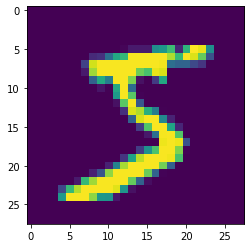

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.show()


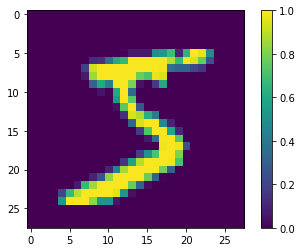

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
print(y_train[0])

5


In [3]:
print(y_train.shape)
print(len(y_train))
print(y_train)
x_train.shape

(60000,)
60000
[5 0 4 ... 5 6 8]


(60000, 28, 28)

In [10]:
# x_test = test_images, y_test = test_labels

print(x_test.shape)
print(len(y_test))
print(y_test)

(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


## normalize¶

In [11]:
x_train = x_train.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

In [12]:
print (y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [13]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
print (y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [15]:
from keras import models
from keras import layers

network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [16]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [17]:
network.fit(x_train, y_train, epochs=5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.2564 - accuracy: 0.9264
Epoch 2/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.1015 - accuracy: 0.9697
Epoch 3/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0676 - accuracy: 0.9794
Epoch 4/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.0487 - accuracy: 0.9857
Epoch 5/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.0372 - accuracy: 0.9890


In [18]:
test_loss, test_acc = network.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 63us/step


In [19]:
print('test_acc:', test_acc)

test_acc: 0.9812999963760376


## cnn : 합성곱 신경망(cnn) 사용

In [27]:
# The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.
import tensorflow as tf
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# model.add(layers.MaxPooling2D((2, 2)))
model.add(tf.nn.max_pool2d(1, 2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# model.add(layers.MaxPooling2D((2, 2)))
model.add(tf.nn.max_pool2d((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

TypeError: max_pool2d() missing 1 required positional argument: 'padding'

In [ ]:
model.summary()

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
from keras.utils import to_categorical

import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [ ]:
print(test_acc)